In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Data

In [2]:
df = 10
X = np.linspace(0, 50, num=500)
Y = np.exp(-X/df) * np.sin(X)
Z = np.exp(-X/df) * np.cos(X)

# Placing Text

For more information start looking [here](https://matplotlib.org/users/text_intro.html).

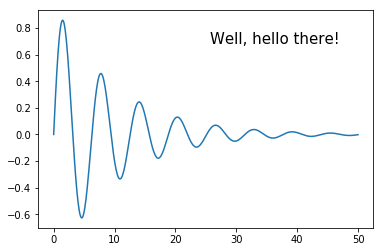

In [4]:
fig, ax = plt.subplots(1,1)
ax.plot(X, Y)
ax.text(0.9, 0.9, 'Well, hello there!', 
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes, fontsize=15)

# $\large{\LaTeX!!}$

Is totally possible and can be configured very deeply.

To not have to esquape all backslashes use raw strings via `r'somestring'`. Not using raw strings can sometimes work but when using escapeable characters like `\t`, `\n`, etc, will lead to strange texts in your plot.

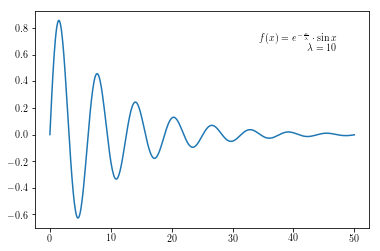

In [11]:
equation = r'$f(x) = e^{-\frac{x}{\lambda}} \cdot \sin{x}$' \
         + '\n' \
         + r'$\lambda = {}$'.format(df)
        
fig, ax = plt.subplots(1,1)
ax.plot(X, Y)
ax.text(0.9, 0.9, equation, 
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes)

# Equations with a custom latex preamble

In [9]:
import matplotlib as mpl

latex_custom_preamble = {
    "font.family": "serif",       # use serif/main font for text elements
    "text.usetex": True,          # use inline math for ticks
    "text.latex.preamble": [
        r"\usepackage{amsmath}",  # for the align environment
        ]
}

mpl.rcParams.update(latex_custom_preamble)

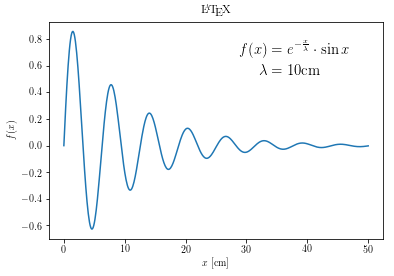

In [10]:
equation = r'\begin{align*}'
equation += r'f(x) &= e^{-\frac{x}{\lambda}} \cdot \sin{x} \\ '
equation += r'\lambda &= {} \text{{cm}} '.format(df)
equation += r'\end{align*}'

fig, ax = plt.subplots(1,1)
ax.plot(X, Y)
ax.text(0.9, 0.9, equation, 
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        fontsize=15)
ax.set_xlabel('$x$ [cm]')
ax.set_ylabel('$f(x)$')
ax.set_title('\LaTeX')

# Annotations

There is a lot of information here:
https://matplotlib.org/users/annotations.html

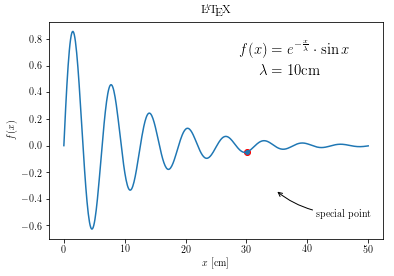

In [13]:
equation = r'\begin{align*}'
equation += r'f(x) &= e^{-\frac{x}{\lambda}} \cdot \sin{x} \\ '
equation += r'\lambda &= {} \text{{cm}} '.format(df)
equation += r'\end{align*}'

datum = (X[300], Y[300])

fig, ax = plt.subplots(1,1)
ax.plot(X, Y)
ax.text(0.9, 0.9, equation, 
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        fontsize=15)

ax.scatter(datum[0], datum[1], edgecolor='red')
ax.annotate('special point',
            xy=datum,
            xytext=(0.8, 0.1),
            textcoords=ax.transAxes,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle='arc3,rad=-0.3',
                            facecolor='black',
                            shrinkB=50))
ax.set_xlabel('$x$ [cm]')
ax.set_ylabel('$f(x)$')
ax.set_title('\LaTeX')

# Ticks and labels

More examples [here](https://matplotlib.org/examples/ticks_and_spines/tick-locators.html).

While usually ticks and labels are placed well automatically, sometimes it is handy to control what is happening.

### Placing and Formatting Ticks

In [14]:
import matplotlib.ticker as ticker

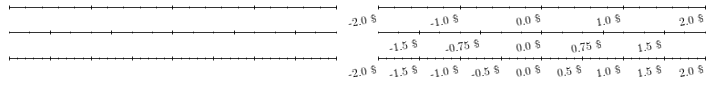

In [16]:
xlim = -2, 2
locators = [[ticker.LinearLocator(5), ticker.LinearLocator(21)],
            [ticker.MultipleLocator(0.75), ticker.MultipleLocator(0.25)],
            [ticker.AutoLocator(), ticker.AutoMinorLocator()]]

def dollar(val, pos):
    return u'{} \$'.format(val)

formatters = [[ticker.NullFormatter(), ticker.NullFormatter()],
            [ticker.FuncFormatter(dollar), ticker.NullFormatter()]]

fig, AX = plt.subplots(len(locators), len(formatters), figsize=(10, 1.2))

for axes, (maj_l, min_l) in zip(AX, locators):
    for ax, (maj_f, min_f) in zip(axes, formatters):
        ax.xaxis.set_major_locator(maj_l)
        ax.xaxis.set_major_formatter(maj_f)
        ax.xaxis.set_minor_locator(min_l)
        ax.xaxis.set_minor_formatter(min_f)
        ax.set_xlim(xlim)
        ax.set_ylim(0,1)
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.spines['left'].set_color('none')
        ax.set_yticks([])
        ax.patch.set_visible(False)
        
        # And now mess everything up :)
        ax.tick_params(which='major', direction='inout', pad=5)
        ax.tick_params(which='minor', direction='inout')
        plt.setp(ax.get_xticklabels(), rotation=10, fontsize=12, horizontalalignment='right')

fig.tight_layout()

## Labels

In [17]:
X = np.arange(10)
Y = np.random.uniform(size=[10])

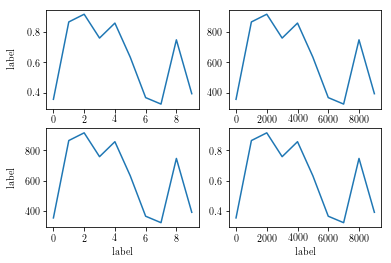

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
ax1.plot(X, Y)
ax2.plot(1000*X, 1000*Y)
ax3.plot(X, 1000*Y)
ax4.plot(1000*X, Y)

ax1.set_ylabel('label')
ax3.set_ylabel('label')
ax3.set_xlabel('label')
ax4.set_xlabel('label')

pos_x = -0.2
pos_y = -0.2
ax1.yaxis.set_label_coords(pos_x, 0.5)
ax3.yaxis.set_label_coords(pos_x, 0.5)
ax3.xaxis.set_label_coords(0.5, pos_y)
ax4.xaxis.set_label_coords(0.5, pos_y)